# General Data Clustering

## Imports

In [796]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import math

## Functions

In [799]:
def calculate_bmi(weight, height):
    height /= 100.0
    return round(weight / math.pow(height, 2), 2)

In [801]:
def replace_bmi(df):
    for i in range(len(df['BMI'])):
        df.loc[i, 'BMI'] = calculate_bmi(df['Weight'][i].copy(), df['Height'][i].copy())

## Load Dataset & Initial Fix

In [804]:
df = pd.read_excel('GeneralData.xlsx')

Translate the columns with hebrew names to english

In [805]:
df.rename(columns={'גורם משלם': 'Paying institute'}, inplace=True)
df.rename(columns={'משקל': 'Weight'}, inplace=True)
df.rename(columns={'גובה': 'Height'}, inplace=True)
df.rename(columns={'מחלות כרוניות': 'Chronic_diseases'}, inplace=True)
df.rename(columns={'מספר ילדים': 'Number_of_children'}, inplace=True)
df.rename(columns={'מצב משפחתי': 'Marital_status'}, inplace=True)
df.rename(columns={'השכלה': 'Education'}, inplace=True)
df.rename(columns={'תרופות קבועות': 'Regular_medications'}, inplace=True)

In [806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient              4535 non-null   int64  
 1   age                  4535 non-null   int64  
 2   Gender               4535 non-null   object 
 3   Paying institute     4524 non-null   object 
 4   Weight               3718 non-null   float64
 5   Height               3698 non-null   float64
 6   BMI                  3504 non-null   float64
 7   Chronic_diseases     4535 non-null   int64  
 8   Education            2641 non-null   object 
 9   Number_of_children   4373 non-null   object 
 10  Marital_status       4474 non-null   object 
 11  Regular_medications  4495 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 425.3+ KB


Check for null values

In [807]:
np.sum(df.isnull(), axis = 0)

Patient                   0
age                       0
Gender                    0
Paying institute         11
Weight                  817
Height                  837
BMI                    1031
Chronic_diseases          0
Education              1894
Number_of_children      162
Marital_status           61
Regular_medications      40
dtype: int64

We can see that we have some null values in a few columns. We will fill these fields.

First we will fill the 'Weight' and 'Height' columns with the mean values.

In [812]:
weight_mean = round(df['Weight'].mean(), 2)
height_mean = round(df['Height'].mean(), 2)
print(f'Weight Mean: {weight_mean}')
print(f'Height Mean: {height_mean}')

Weight Mean: 75.9
Height Mean: 165.24


In [814]:
df.fillna({'Weight': weight_mean}, inplace=True)
df.fillna({'Height': height_mean}, inplace= True)

In [816]:
np.sum(df.isnull(), axis = 0)

Patient                   0
age                       0
Gender                    0
Paying institute         11
Weight                    0
Height                    0
BMI                    1031
Chronic_diseases          0
Education              1894
Number_of_children      162
Marital_status           61
Regular_medications      40
dtype: int64

We can see that the fields were indeed filled with the mean values.

From a small look into the GeneralData sheet, many values in the 'BMI' were wrong. For this reason, we decided to replace the BMI values with new values calculated according to the Height and Weight columns after filling the missing rows.

In [818]:
replace_bmi(df)

In [819]:
np.sum(df.isnull(), axis = 0)

Patient                   0
age                       0
Gender                    0
Paying institute         11
Weight                    0
Height                    0
BMI                       0
Chronic_diseases          0
Education              1894
Number_of_children      162
Marital_status           61
Regular_medications      40
dtype: int64

After we replaced the values in the 'BMI' column, we can now fix the 'Marital_status' column.

We will fill the missing rows with the most common value in the data.

In [820]:
df['Marital_status'].value_counts()

Marital_status
נשוי    2305
אלמן    1542
גרוש     425
רווק     186
פרוד      16
Name: count, dtype: int64

In [821]:
df.fillna({'Marital_status': 'נשוי'}, inplace=True)

In [822]:
np.sum(df.isnull(), axis = 0)

Patient                   0
age                       0
Gender                    0
Paying institute         11
Weight                    0
Height                    0
BMI                       0
Chronic_diseases          0
Education              1894
Number_of_children      162
Marital_status            0
Regular_medications      40
dtype: int64

We will now attempt to fill the 'Number_of_children' column in the same way we did for 'Marital_status' column.

In [823]:
df['Number_of_children'].value_counts()

Number_of_children
3                      1216
2                      1005
4                       652
1                       399
5                       340
0                       236
6                       175
7                       129
8                        77
9                        60
10                       41
11                       16
12                       11
13                        6
14                        4
1 + 2 (נפטרו)             1
4           4             1
2( ילדים בחוץ לארץ)       1
15                        1
נכדה  אחת                 1
אין                       1
Name: count, dtype: int64

We can see that the 'Number_of_children' contain some other fields that are strings and not numbers, we will replace these fields with numbers as we can see that they each have only one row that they are filled in. 

In [830]:
print(np.where(df['Number_of_children'] == 'אין'))
print(np.where(df['Number_of_children'] == '1 + 2 (נפטרו)'))
print(np.where(df['Number_of_children'] == '4           4'))
print(np.where(df['Number_of_children'] == 'נכדה  אחת'))
print(np.where(df['Number_of_children'] == '2( ילדים בחוץ לארץ)'))

(array([2467], dtype=int64),)
(array([478], dtype=int64),)
(array([588], dtype=int64),)
(array([1978], dtype=int64),)
(array([1292], dtype=int64),)


In [832]:
df.loc[2467, 'Number_of_children'] = 0
df.loc[478, 'Number_of_children'] = 1
df.loc[588, 'Number_of_children'] = 4
df.loc[1978, 'Number_of_children'] = 1
df.loc[1292, 'Number_of_children'] = 2

In [834]:
df['Number_of_children'] = df['Number_of_children'].astype(float)

In [836]:
df['Number_of_children'].value_counts()

Number_of_children
3.0     1216
2.0     1006
4.0      653
1.0      401
5.0      340
0.0      237
6.0      175
7.0      129
8.0       77
9.0       60
10.0      41
11.0      16
12.0      11
13.0       6
14.0       4
15.0       1
Name: count, dtype: int64

In [838]:
df.fillna({'Number_of_children': 1.0}, inplace=True)

In [840]:
np.sum(df.isnull(), axis = 0)

Patient                   0
age                       0
Gender                    0
Paying institute         11
Weight                    0
Height                    0
BMI                       0
Chronic_diseases          0
Education              1894
Number_of_children        0
Marital_status            0
Regular_medications      40
dtype: int64

In [842]:
df['Number_of_children'].value_counts()

Number_of_children
3.0     1216
2.0     1006
4.0      653
1.0      563
5.0      340
0.0      237
6.0      175
7.0      129
8.0       77
9.0       60
10.0      41
11.0      16
12.0      11
13.0       6
14.0       4
15.0       1
Name: count, dtype: int64

In [844]:
df['Number_of_children'] = df['Number_of_children'].astype(int)

In [846]:
np.sum(df.isnull(), axis = 0)

Patient                   0
age                       0
Gender                    0
Paying institute         11
Weight                    0
Height                    0
BMI                       0
Chronic_diseases          0
Education              1894
Number_of_children        0
Marital_status            0
Regular_medications      40
dtype: int64

In [848]:
df.fillna({'Regular_medications': -1}, inplace=True)

In [850]:
np.sum(df.isnull(), axis = 0)

Patient                   0
age                       0
Gender                    0
Paying institute         11
Weight                    0
Height                    0
BMI                       0
Chronic_diseases          0
Education              1894
Number_of_children        0
Marital_status            0
Regular_medications       0
dtype: int64

After filling the missing rows in 'Number_of_children' we will now drop the columns that are irrelevant for the research question and proceed to the clustering process.

In [852]:
df.drop(columns=['Paying institute', 'Education', 'Patient'], axis = 0, inplace=True)

In [854]:
df

,age,Gender,Weight,Height,BMI,Chronic_diseases,Number_of_children,Marital_status,Regular_medications
0,84,זכר,92.0,170.0,31.83,1,3,נשוי,"10815 , 11282 , 1183 , 1196 , 12758 , 13027 ,..."
1,89,נקבה,45.0,150.0,20.00,0,1,גרוש,"10337 , 1130 , 1448 , 1466 , 186 , 2482 , 290..."
2,87,זכר,67.7,165.0,24.87,0,2,נשוי,"1183 , 1310 , 2451 , 2566 , 4967 , 6718 , 672..."
3,90,נקבה,94.0,165.0,34.53,0,1,גרוש,"1100 , 1181 , 1182 , 1183 , 12757 , 1283 , 12..."
4,87,זכר,70.0,163.0,26.35,0,3,נשוי,"10214 , 1212 , 12725 , 2882 , 6737 , 7852 , 7..."
...,...,...,...,...,...,...,...,...,...
4530,82,זכר,69.0,180.0,21.30,0,3,נשוי,"1150 , 1682 , 2043 , 2150 , 2188 , 2566 , 260..."
4531,79,זכר,64.0,170.0,22.15,0,4,נשוי,-1
4532,99,זכר,60.0,170.0,20.76,0,3,אלמן,"12284 , 2384 , 2412 , 2791 , 2843 , 3211 , 32..."
4533,75,זכר,97.0,170.0,33.56,0,3,נשוי,"1183 , 12730 , 1637 , 2568 , 37 , 3724 , 4856..."


In [856]:
np.sum(df.isnull(), axis = 0)

age                    0
Gender                 0
Weight                 0
Height                 0
BMI                    0
Chronic_diseases       0
Number_of_children     0
Marital_status         0
Regular_medications    0
dtype: int64

In [858]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [860]:
df['Marital_status'] = label_encoder.fit_transform(df['Marital_status'])

In [862]:
relevant_features = ['age', 'Gender', 'BMI', 'Chronic_diseases', 'Number_of_children', 'Marital_status']

In [864]:
df_relevant = df[relevant_features]
df_relevant = df_relevant.dropna()

In [866]:
df_relevant['Chronic_diseases'] = df['Chronic_diseases'].astype(int)
df_relevant['Chronic_diseases'].dtype

dtype('int32')

In [880]:
df_test = df_relevant.copy()

In [882]:
cols_to_scale = []
for col in df_relevant.columns:
    if df_relevant[col].dtype == 'int64' or df_relevant[col].dtype == 'float64':
        cols_to_scale.append(col)

print(cols_to_scale)

['age', 'BMI']


In [884]:
df_relevant.dtypes

age                     int64
Gender                  int32
BMI                   float64
Chronic_diseases        int32
Number_of_children      int32
Marital_status          int32
dtype: object

We will scale the numeric data before clustering so they will be on the same scale.

In [886]:
# Step 2: Preprocess the Data
scaler = StandardScaler()
df_test[['age', 'BMI']] = scaler.fit_transform(df_relevant[['age', 'BMI']])

We will perform clustering using K-Means method.

In [888]:
# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
label = kmeans.fit_predict(df_test)
centroids = kmeans.cluster_centers_
df_relevant['Cluster'] = label

In [892]:
df_relevant['Cluster']

0       1
1       2
2       2
3       2
4       1
       ..
4530    1
4531    1
4532    1
4533    1
4534    1
Name: Cluster, Length: 4535, dtype: int32

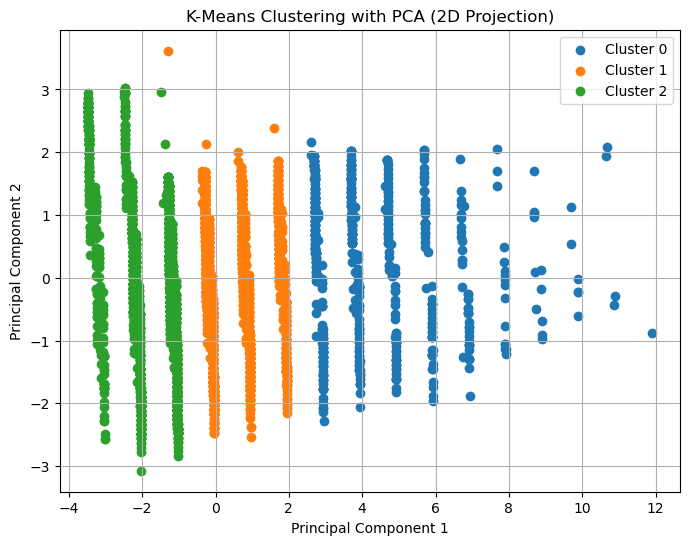

In [894]:
# Perform PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_test)

# Assuming 'label' contains the cluster assignments
u_labels = np.unique(label)

# Plotting the results in 2D using the principal components
plt.figure(figsize=(8, 6))
for i in u_labels:
    plt.scatter(pca_features[label == i, 0], pca_features[label == i, 1], label=f'Cluster {i}')

plt.legend()
plt.title("K-Means Clustering with PCA (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()